In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
#CREATE DATASET
input = np.linspace(-5,5,100)

def f(x):
    return x**4 - 10*x**2 + 10

output = []
for i in input:
    output.append(f(i))
    
output = np.array(output)

input = input.reshape((100,1))
output = output.reshape((100,1))

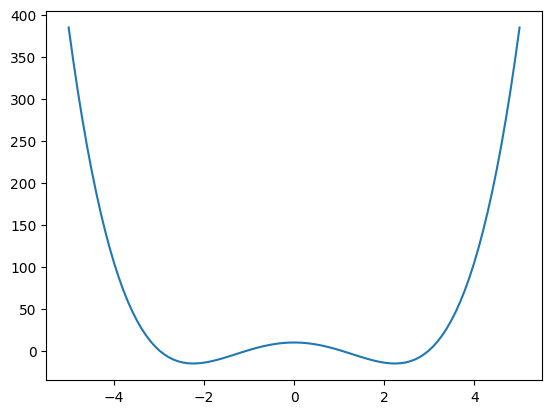

In [4]:
#plotting data
plt.plot(input,output)

In [5]:
class Dense:
    def __init__(self,n_inputs,n_neuron) -> None:
        self.weights = np.random.randn(n_inputs,n_neuron)
        self.biases = np.zeros((1,n_neuron))
    def forward(self,inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [6]:
class Activation_ReLU:
    def forward(self,inputs):
        self.output = np.maximum(0,inputs)    

In [7]:
class Activation_Softmax:
    def forward(self,inputs):
        exp_values = np.exp(inputs - np.max(inputs,axis=1,keepdims=True))
        prob = exp_values/np.sum(exp_values,axis=1,keepdims=True)
        self.output = prob

In [8]:
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

In [9]:
class Loss_Categorical_Cross_Entropy(Loss):
    def forward(self, y_pred, y_true):
        sample = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7 , 1-1e-7)
        
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(sample), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis = 1)
            
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
 

In [10]:
layer1 = Dense(1,4)
act1 = Activation_ReLU()
layer2 = Dense(4,4)
act2 = Activation_Softmax()
layer3 = Dense(4,1)

    

In [11]:
layer1.forward(input)
act1.forward(layer1.output)
layer2.forward(act1.output)
act2.forward(layer2.output)
layer3.forward(act2.output)
layer3.output.shape

(100, 1)

In [12]:
for i,j in zip(layer3.output, output):
    print(i,j)

[-0.02932269] [385.]
[-0.0359684] [346.00387717]
[-0.04271392] [309.74238988]
[-0.049552] [276.09561261]
[-0.05647459] [244.94611824]
[-0.06347284] [216.17897814]
[-0.07053708] [189.68176211]
[-0.07765678] [165.34453839]
[-0.08482055] [143.05987368]
[-0.09201616] [122.72283314]
[-0.0992305] [104.23098036]
[-0.10644964] [87.48437738]
[-0.11365878] [72.38558471]
[-0.12084233] [58.83966127]
[-0.12798392] [46.75416448]
[-0.13506645] [36.03915016]
[-0.14207211] [26.60717261]
[-0.14898246] [18.37328457]
[-0.15577852] [11.25503722]
[-0.16244078] [5.17248021]
[-0.16894936] [0.04816161]
[-0.17528405] [-4.19287204]
[-0.18142443] [-7.62307575]
[-0.18734997] [-10.3124061]
[-0.19304015] [-12.3283212]
[-0.19847459] [-13.73578072]
[-0.20363314] [-14.59724588]
[-0.20849605] [-14.97267946]
[-0.21304406] [-14.91954578]
[-0.21725853] [-14.49281072]
[-0.22112162] [-13.7449417]
[-0.22461631] [-12.72590769]
[-0.22772664] [-11.48317923]
[-0.23043771] [-10.0617284]
[-0.23273585] [-8.50402882]
[-0.23460873] [-

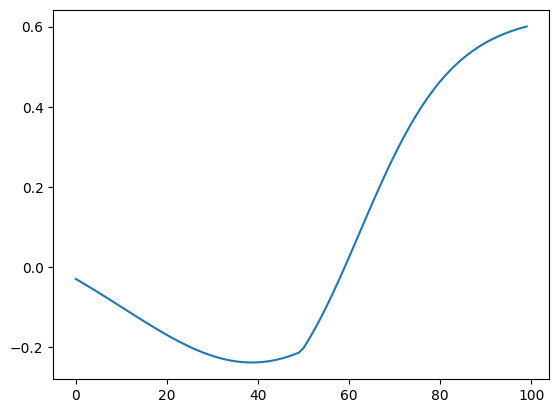

In [14]:
plt.plot(layer3.output)